In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('/Users/arman/Skripsi/Dataset/BigData/Fix/Piala-Dunia-Label-Clean.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df

,Steming,Label
0,lupa gagal tuan rumah piala dunia mari tata se...,negatif
1,gagal helat piala dunia indonesia jadi alam de...,positif
2,citra bela palestina guna syal palestina baca ...,negatif
3,tuan rumah piala dunia bentar tuan rumah,netral
4,ketua erick thohir alas fifa batal posisi indo...,netral
...,...,...
14802,piala dunia batal gelar indonesia,netral
14803,juang indonesia tuan rumah piala dunia siasia,negatif
14804,guru indonesia tuan rumah piala dunia nasib sa...,netral
14805,main timnas indonesia ramai ramai tumpah kecew...,negatif


In [3]:
pd.value_counts(df['Label'])

negatif    6769
positif    4946
netral     3092
Name: Label, dtype: int64

## Split Dataset

In [4]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.3, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutanny

In [5]:
# Membuat data frame dari hasil split
df_train = pd.DataFrame()
df_train['Steming'] = train_X
df_train['Label'] = train_Y

df_test30 = pd.DataFrame()
df_test30['Steming'] = test_X
df_test30['Label'] = test_Y

In [6]:
#Data frame train hasil pembagian 
df_train

,Steming,Label
12607,ganjar buka suara kait batal piala dunia indon...,netral
3954,terima surat fifa kait putus batal selenggara ...,negatif
1706,kaca hak tuan rumah piala dunia cabut fifa lep...,netral
8316,federasi sepak bola dunia fifa indonesia tuan ...,positif
9472,andil ganjar batal piala dunia jokowi dukung p...,positif
...,...,...
13123,indonesia batal tuan rumah piala dunia bukti b...,negatif
3264,piala dunia bangkit sepak bola indonesia hancu...,positif
9845,apa laksana final piala dunia laksana indonesi...,negatif
10799,klik bola gol berita kini nyata presiden jokow...,positif


In [7]:
#Data Frame test Hasil Pembagian
df_test30

,Steming,Label
3017,lapang kerja potensi putar uang gera garagara ...,positif
14806,politikus budiman sudjatmiko tolak timnas isra...,positif
3299,juang erick thohir apresiasi keringat air mata...,positif
7443,arah jokowi coret ri tuan rumah piala dunia,netral
12133,batal piala dunia main politik pk mancing kepa...,netral
...,...,...
5252,opini fifa resmi batal indonesia tuan rumah pi...,negatif
4604,make doang batal piala dunia haduh,netral
6628,ahy sesal gagal piala dunia ahy dukung timnas,negatif
855,pssi bantah piala dunia batal indonesia infras...,negatif


## Pembobotan TF-IDF

In [8]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(df['Steming'])
train_X_tfidf = tfidf_vect.transform(df_train['Steming'])
test_X_tfidf_30 = tfidf_vect.transform(df_test30['Steming'])

In [9]:
#melihat hasil pembobotan TF-IDF pada data test
print(test_X_tfidf_30)

  (0, 9416)	0.26066953234988866
  (0, 8664)	0.23423457162099068
  (0, 8517)	0.3504609394288991
  (0, 8154)	0.20050438643956053
  (0, 7323)	0.2729001685128544
  (0, 7116)	0.21527800895750324
  (0, 6933)	0.03891918591005691
  (0, 6614)	0.2583219915296451
  (0, 6500)	0.35689149003129245
  (0, 5955)	0.1647851754500186
  (0, 4787)	0.2495297447834159
  (0, 4265)	0.2223879640373007
  (0, 3907)	0.25539814546778794
  (0, 2751)	0.3112509460741837
  (0, 2656)	0.23946352281187164
  (0, 2141)	0.03885615832444293
  (0, 135)	0.19465731462621114
  (1, 9202)	0.20885910411352815
  (1, 9133)	0.16403970027001893
  (1, 8601)	0.6057597350980152
  (1, 7077)	0.41821735326723036
  (1, 6933)	0.061437879229306595
  (1, 5098)	0.2111696353327572
  (1, 3588)	0.18238545282025287
  (1, 2141)	0.061338383797875554
  :	:
  (4439, 2028)	0.4796876451171491
  (4439, 769)	0.11693852774875547
  (4440, 9133)	0.25456056704852453
  (4440, 8163)	0.40688599177195806
  (4440, 6933)	0.09534070928639382
  (4440, 2582)	0.275727750903

In [10]:
print(train_X_tfidf.shape)
print(test_X_tfidf_30.shape)

(10364, 9978)
(4443, 9978)


In [11]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect.vocabulary_)

{'lupa': 5036, 'gagal': 2582, 'tuan': 9315, 'rumah': 7678, 'piala': 6933, 'dunia': 2141, 'mari': 5221, 'tata': 8867, 'sepak': 8119, 'bola': 1147, 'indonesia': 3379, 'depan': 1775, 'kelam': 4165, 'mata': 5275, 'internasional': 3521, 'anti': 369, 'jajah': 3675, 'sinar': 8288, 'persepakbolaan': 6867, 'helat': 3100, 'jadi': 3655, 'alam': 195, 'dewasa': 1813, 'bangun': 701, 'semangat': 8044, 'tanah': 8803, 'air': 124, 'cinta': 1496, 'sepakbola': 8122, 'kuat': 4637, 'milik': 5585, 'respons': 7555, 'citra': 1509, 'bela': 855, 'palestina': 6540, 'guna': 2911, 'syal': 8712, 'baca': 579, 'buku': 1279, 'kait': 3951, 'sok': 8420, 'duluan': 2132, 'ganjar': 2632, 'kurang': 4672, 'tapi': 8843, 'pas': 6634, 'diam': 1826, 'kontradiktif': 4531, 'bentar': 907, 'ketua': 4315, 'erick': 2329, 'thohir': 9083, 'alas': 200, 'fifa': 2460, 'batal': 769, 'posisi': 7105, 'lanjut': 4778, 'ajang': 135, 'situasi': 8334, 'kini': 4362, 'deret': 1785, 'nyata': 6310, 'bijak': 1047, 'pranowo': 7151, 'tuai': 9312, 'kontrov

## Penerapan Model SVM

## Kernel Linear

In [12]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear', 
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

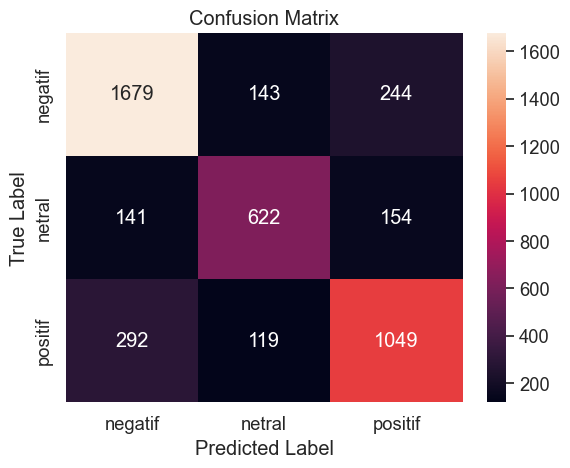

In [13]:
# Proses Pengujian
predictions_SVM = clf.predict(test_X_tfidf_30)

#pembuatan data frame
test_prediction_30 = pd.DataFrame()
test_prediction_30['Text'] = test_X
test_prediction_30['Label'] = predictions_SVM
# test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [14]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM, average='macro'))



              precision    recall  f1-score   support

     negatif       0.79      0.81      0.80      2066
      netral       0.70      0.68      0.69       917
     positif       0.72      0.72      0.72      1460

    accuracy                           0.75      4443
   macro avg       0.74      0.74      0.74      4443
weighted avg       0.75      0.75      0.75      4443

Accuracy of the model :  0.753995048390727
Precision of the model:  0.7411830462443546
Recall of the model:  0.7364911537619019
F1-score of the model:  0.7387224813253161


## Kernel Poly

In [22]:
from sklearn.svm import SVC
#Menerapkan pemodelan SVM pada data train
modelpoly = SVC(kernel='poly', 
            decision_function_shape='ovr')
clfpoly = modelpoly.fit(train_X_tfidf,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

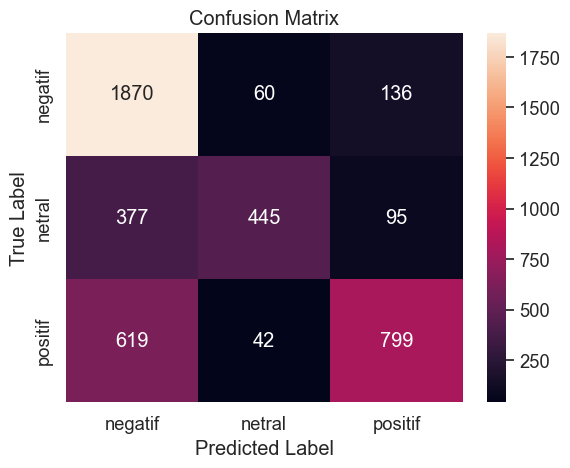

In [23]:
# Proses Pengujian
predictions_SVM_poly = clfpoly.predict(test_X_tfidf_30)

#menyimpan ke dalam dataframe
# test_prediction_8020_poly = pd.DataFrame()
# test_prediction_8020['Text'] = test_X
# test_prediction_8020['Label'] = predictions_SVM_8020_poly
# test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_poly), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [24]:
# Accuracy, Precision, Recall, f1-score
print (classification_report(test_Y, predictions_SVM_poly))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_poly))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_poly, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_poly, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_poly, average='macro'))



              precision    recall  f1-score   support

     negatif       0.65      0.91      0.76      2066
      netral       0.81      0.49      0.61       917
     positif       0.78      0.55      0.64      1460

    accuracy                           0.70      4443
   macro avg       0.75      0.65      0.67      4443
weighted avg       0.73      0.70      0.69      4443

Accuracy of the model :  0.700877785280216
Precision of the model:  0.7472446040090367
Recall of the model:  0.6458896806630069
F1-score of the model:  0.6693345410413275


## Kernel RBF

In [18]:

#Menerapkan pemodelan SVM pada data train
modelRBF = SVC(kernel='rbf', 
            decision_function_shape='ovr')
clfRBF = modelRBF.fit(train_X_tfidf,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

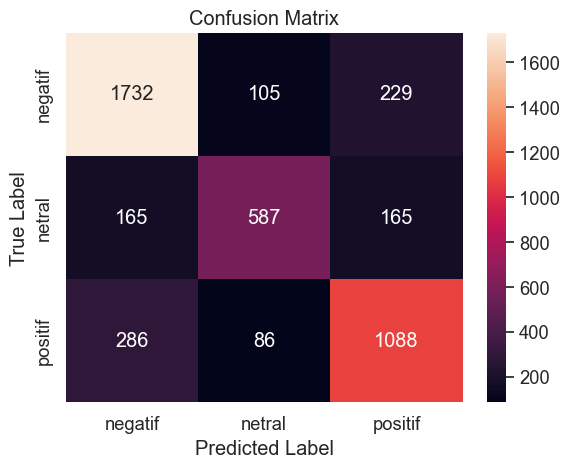

In [25]:
# Proses Pengujian
predictions_SVM_RBF = clfRBF.predict(test_X_tfidf_30)

#menyimpan ke dalam dataframe
# test_prediction_8020_poly = pd.DataFrame()
# test_prediction_8020['Text'] = test_X
# test_prediction_8020['Label'] = predictions_SVM_8020_poly
# test_prediction_8020.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/test_prediction_8020.csv')

#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_RBF), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [26]:
# Accuracy, Precision, Recall, f1-score
print (classification_report(test_Y, predictions_SVM_RBF))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_RBF))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_RBF, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_RBF, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_RBF, average='macro'))



              precision    recall  f1-score   support

     negatif       0.79      0.84      0.82      2066
      netral       0.75      0.64      0.69       917
     positif       0.73      0.75      0.74      1460

    accuracy                           0.77      4443
   macro avg       0.76      0.74      0.75      4443
weighted avg       0.77      0.77      0.77      4443

Accuracy of the model :  0.766824217870808
Precision of the model:  0.7606817792166899
Recall of the model:  0.7412237625713268
F1-score of the model:  0.7491696395766304


In [27]:
print("Accuracy of the model RBF : ", accuracy_score(test_Y, predictions_SVM_RBF))
print("Accuracy of the model POLY: ", accuracy_score(test_Y, predictions_SVM_poly))
print("Accuracy of the model LINEAR: ", accuracy_score(test_Y, predictions_SVM))

Accuracy of the model RBF :  0.766824217870808
Accuracy of the model POLY:  0.700877785280216
Accuracy of the model LINEAR:  0.753995048390727
